# Exploratory Data Analysis on Sales Data

### Analyzing sales to understand trends and generate insights.

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
%matplotlib inline 
sns.set(color_codes=True)

In [56]:
dt = pd.read_excel('AdvWorksData.xlsx')

In [4]:
dt.head(3)

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,6.9223,5.0136,0.02,1.4038,8.6442,96.9122,-28.125608,14,68.786592
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,10.3125,15.0000,0.00,0.0000,25.0000,61.8750,28.125000,6,90.000000
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.6709,22.7940,0.00,0.0000,37.9900,125.3672,56.984800,8,182.352000


In [5]:
dt.dtypes

productcategory               object
productsubcategory            object
product                       object
saleterritory                 object
Country                       object
City                          object
Sate                          object
Customer                      object
Employee                      object
OrderCount                     int64
OrderDate             datetime64[ns]
StandardCost                 float64
UnitPrice                    float64
UnitPriceDiscount            float64
Discount                     float64
ListPrice                    float64
SaleswithStandard            float64
NetSales                     float64
OrderQuantity                  int64
Sales                        float64
dtype: object

In [57]:
dt = dt[['productcategory', 'product', 'saleterritory', 'Country', 'Sate', 'OrderCount', 'OrderDate', 'Sales', 'UnitPrice', 'OrderQuantity','Discount']]
dt.head(3)

,productcategory,product,saleterritory,Country,Sate,OrderCount,OrderDate,Sales,UnitPrice,OrderQuantity,Discount
0,Clothing,AWC Logo Cap,United Kingdom,United Kingdom,England,1,2012-06-30,68.786592,5.0136,14,1.4038
1,Accessories,Cable Lock,United Kingdom,United Kingdom,England,1,2012-06-30,90.000000,15.0000,6,0.0000
2,Clothing,"Full-Finger Gloves, L",United Kingdom,United Kingdom,England,1,2012-06-30,182.352000,22.7940,8,0.0000


In [58]:
dt = dt.rename(columns = {'productcategory': 'Category', 'saleterritory': 'Territory', 'OrderDate': 'Date', 'OrderQuantity': 'Quantity', 'Sate': 'State'})
dt.head(3)

,Category,product,Territory,Country,State,OrderCount,Date,Sales,UnitPrice,Quantity,Discount
0,Clothing,AWC Logo Cap,United Kingdom,United Kingdom,England,1,2012-06-30,68.786592,5.0136,14,1.4038
1,Accessories,Cable Lock,United Kingdom,United Kingdom,England,1,2012-06-30,90.000000,15.0000,6,0.0000
2,Clothing,"Full-Finger Gloves, L",United Kingdom,United Kingdom,England,1,2012-06-30,182.352000,22.7940,8,0.0000


### Description of data

**Category**, **product**, **Territory**, **Country**, **State** are Categorical Variables
Categorical variables are mostly string type

**OrderCount**, **Sales**, **Quantity**, **Discount** are Numerical Variables
Numeric variables can be discrete or continous.

**Date** is a Datetime variable

In [8]:
dt.shape

(60880, 10)

In [9]:
dt[['Sales', 'Quantity', 'Discount']].describe()

,Sales,Quantity,Discount
count,60880.000000,60880.000000,60880.000000
mean,1322.071356,3.523587,8.664716
std,2124.171872,3.033950,87.723102
min,1.374000,1.000000,0.000000
25%,127.800000,2.000000,0.000000
50%,461.694000,3.000000,0.000000
75%,1466.010000,4.000000,0.000000
max,27893.619000,44.000000,4005.237600


For sales, our main focus in on the Inter quartile range(IQR), i.e., difference betwwen upper(75%) and lower(25%) quantile

**IQR (Sales)** = 1338.21

In [10]:
print(f'Mode of sales:', dt['Sales'].mode())

Mode of sales: 0    419.4589
Name: Sales, dtype: float64


### Distribution of Sales

<Axes: xlabel='Sales', ylabel='Density'>

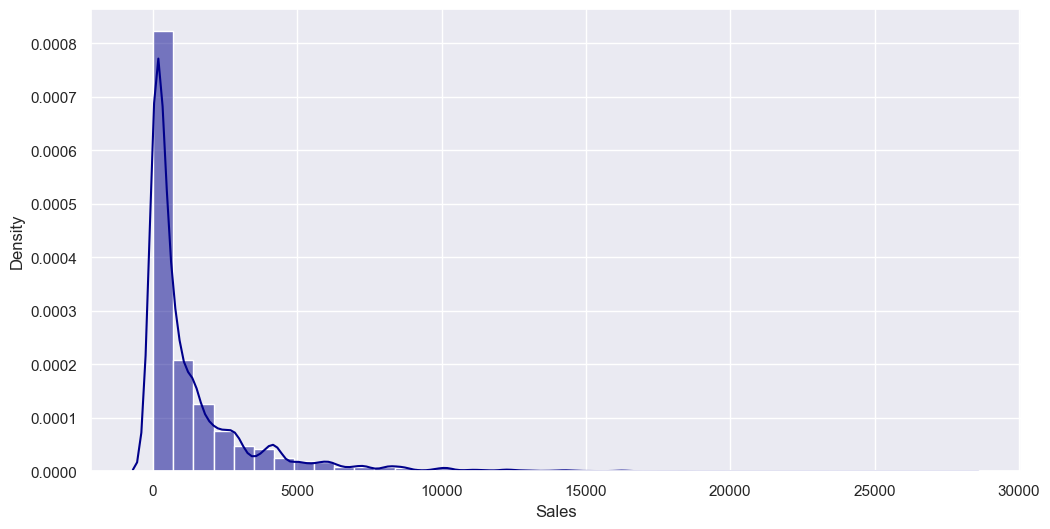

In [11]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize = (12,6))
sns.histplot(dt['Sales'], kde = True, bins = 40, color = 'darkblue',
            stat="density", kde_kws=dict(cut=3))

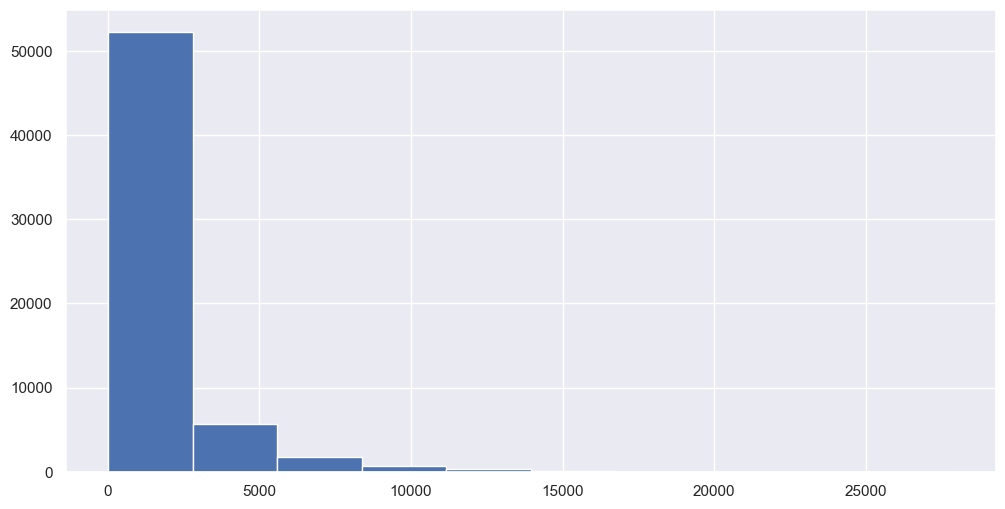

In [12]:
plt.figure(figsize = (12,6))
plt.hist(dt['Sales'])
plt.show()

### Data is right-skewed

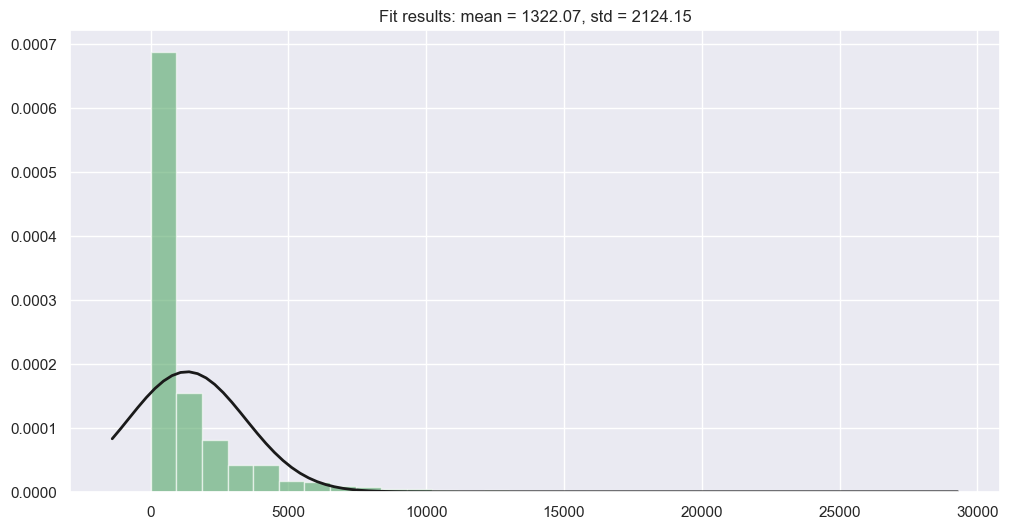

In [13]:
data = dt['Sales']

mn, std = norm.fit(data)
plt.figure(figsize=(12,6))
plt.hist(data, bins=30, density=True, alpha=0.6, color= 'g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mn, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'Fit results: mean = %.2f, std = %.2f' % (mn,std)
plt.title(title)


plt.show()

<Axes: xlabel='Sales'>

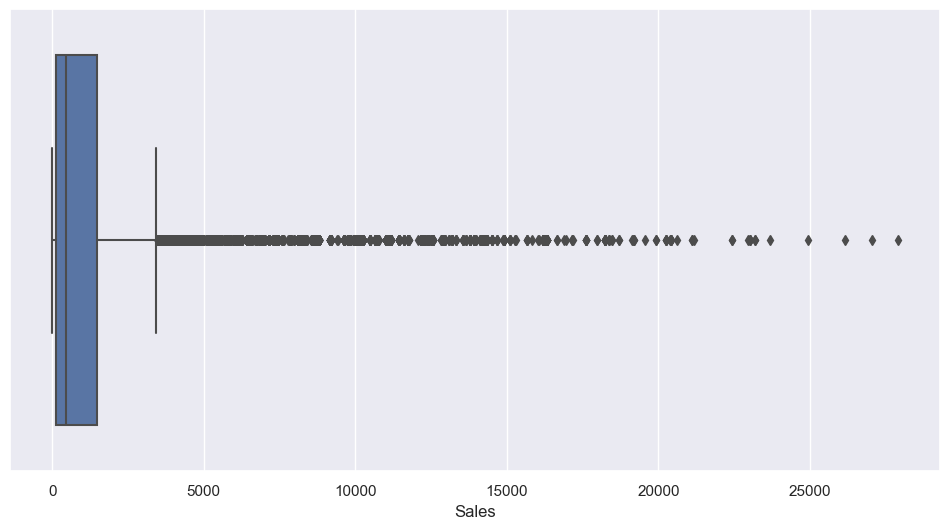

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x = dt['Sales'])

## Function to remove outliers

In [59]:
def detect(dt):
    for i in dt.describe().columns:
        q1 = dt.describe().at['25%', i]
        q3 = dt.describe().at['75%', i]
        iqr = q3 - q1
        ltv = q1 - 1.5 * iqr
        utv = q3 + 1.5 * iqr

        d = np.array(dt[i])
        p = []

        for q in d:
            if q < ltv or q > utv:
                p.append(dt[i].median())
            else:
                p.append(q)

        dt[i] = p
    return dt

In [60]:
detect(dt)

,Category,product,Territory,Country,State,OrderCount,Date,Sales,UnitPrice,Quantity,Discount
0,Clothing,AWC Logo Cap,United Kingdom,United Kingdom,England,1.0,2012-06-30,68.786592,5.0136,3.0,0.0
1,Accessories,Cable Lock,United Kingdom,United Kingdom,England,1.0,2012-06-30,90.000000,15.0000,6.0,0.0
2,Clothing,"Full-Finger Gloves, L",United Kingdom,United Kingdom,England,1.0,2012-06-30,182.352000,22.7940,3.0,0.0
3,Clothing,"Full-Finger Gloves, L",United Kingdom,United Kingdom,England,1.0,2012-06-30,317.596400,20.8945,3.0,0.0
4,Clothing,"Full-Finger Gloves, M",United Kingdom,United Kingdom,England,1.0,2012-06-30,159.558000,22.7940,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
60875,Clothing,"Women's Mountain Shorts, L",Southeast,United States,Georgia,1.0,2014-05-01,335.952000,41.9940,3.0,0.0
60876,Clothing,"Women's Mountain Shorts, L",Southeast,United States,Florida,1.0,2014-05-01,251.964000,41.9940,6.0,0.0
60877,Clothing,"Women's Mountain Shorts, M",Southeast,United States,Georgia,1.0,2014-05-01,125.982000,41.9940,3.0,0.0
60878,Clothing,"Women's Mountain Shorts, S",Southeast,United States,Georgia,1.0,2014-05-01,209.970000,41.9940,5.0,0.0


<Axes: xlabel='Sales'>

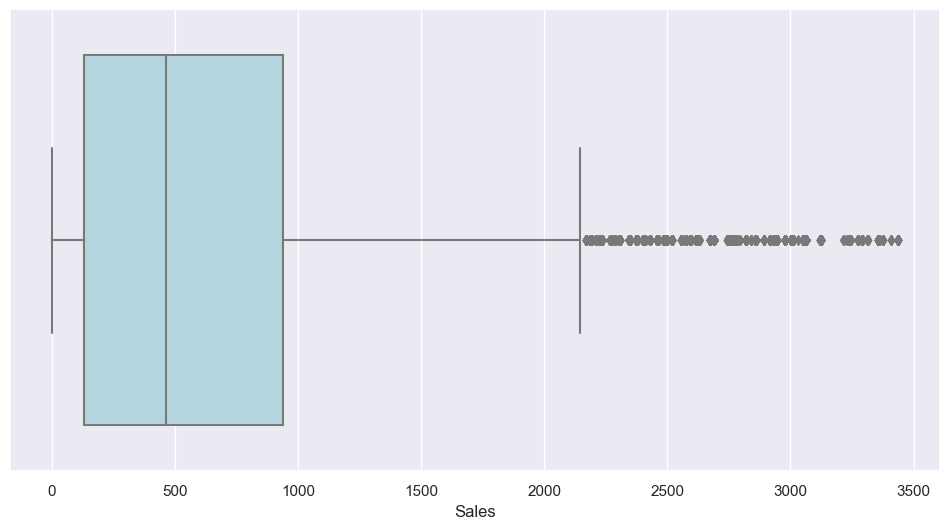

In [125]:
plt.figure(figsize = (12,6))
sns.boxplot(x= dt['Sales'], color='lightblue')

## Removing Duplicate values

In [61]:
dt = dt.drop_duplicates()
dt.shape

(56474, 11)

In [62]:
print(dt.isnull().sum())

Category      39
product       39
Territory      0
Country        0
State          0
OrderCount     0
Date           0
Sales          0
UnitPrice      0
Quantity       0
Discount       0
dtype: int64


In [63]:
dt = dt.dropna()
dt.count()

Category      56435
product       56435
Territory     56435
Country       56435
State         56435
OrderCount    56435
Date          56435
Sales         56435
UnitPrice     56435
Quantity      56435
Discount      56435
dtype: int64

In [64]:
print(dt.isnull().sum())

Category      0
product       0
Territory     0
Country       0
State         0
OrderCount    0
Date          0
Sales         0
UnitPrice     0
Quantity      0
Discount      0
dtype: int64


In [105]:
nc = dt.select_dtypes(include=np.number).columns.tolist()
num_feat_df = dt[nc]
num_feat_df

,OrderCount,Sales,UnitPrice,Quantity,Discount
0,1.0,68.786592,5.0136,3.0,0.0
1,1.0,90.000000,15.0000,6.0,0.0
2,1.0,182.352000,22.7940,3.0,0.0
3,1.0,317.596400,20.8945,3.0,0.0
4,1.0,159.558000,22.7940,7.0,0.0
...,...,...,...,...,...
60875,1.0,335.952000,41.9940,3.0,0.0
60876,1.0,251.964000,41.9940,6.0,0.0
60877,1.0,125.982000,41.9940,3.0,0.0
60878,1.0,209.970000,41.9940,5.0,0.0


## Univariate Analysis

#### Sales by Category

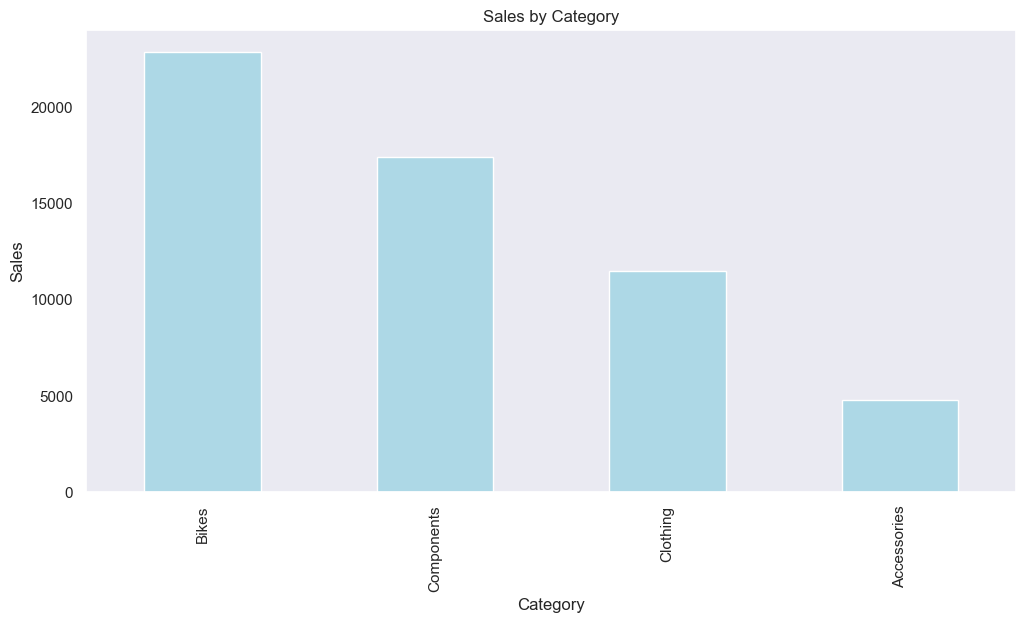

In [121]:
dt.Category.value_counts().plot(kind = 'bar', figsize=(12,6), color = 'lightblue', grid=False)
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category');

In [40]:
dt.Category.value_counts()

Category
Bikes          22785
Components     17371
Clothing       11444
Accessories     4756
Name: count, dtype: int64

In [42]:
cat_tab = pd.crosstab(index = dt['Category'], columns = ['Relative Frequency'])

tab / tab.sum()

col_0,Relative Frequency
Category,
Accessories,0.084392
Bikes,0.404305
Clothing,0.203066
Components,0.308237


#### Sales by Country

Text(0.5, 0, 'Country')

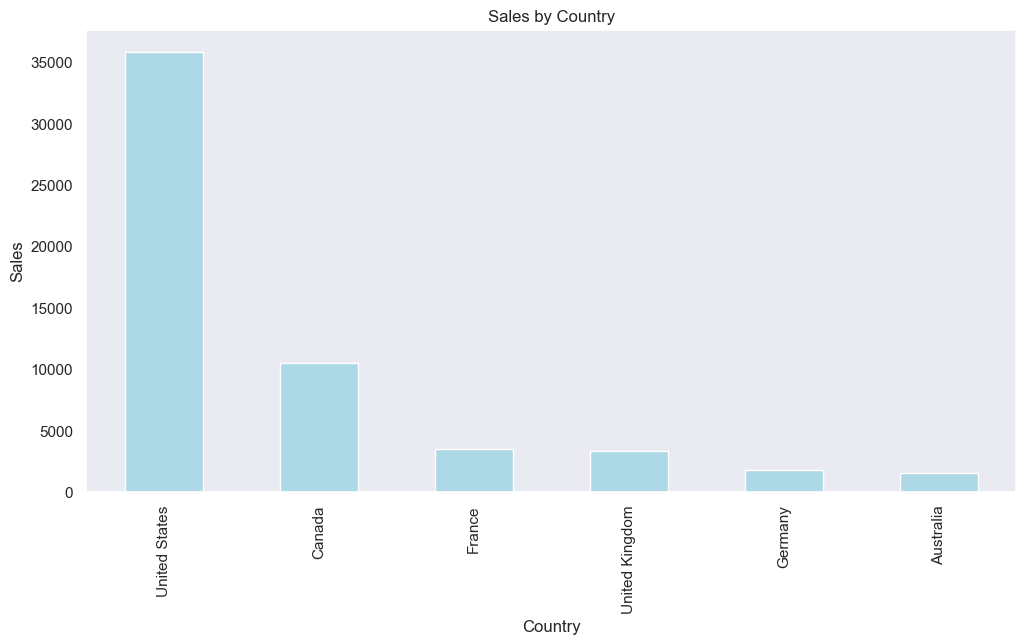

In [120]:
dt.Country.value_counts().plot(kind='bar', figsize=(12,6), color = 'lightblue', grid=False)
plt.title('Sales by Country')
plt.ylabel('Sales')
plt.xlabel('Country')


In [68]:
dt.Country.value_counts()

Country
United States     35850
Canada            10509
France             3505
United Kingdom     3275
Germany            1787
Australia          1509
Name: count, dtype: int64

In [111]:
sales_by_country = dt.groupby('Country')['Sales'].sum().sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
sales_by_country

Country
United States    25,297,270.83
Canada            7,195,421.81
France            2,370,099.65
United Kingdom    2,256,365.05
Germany           1,131,562.00
Australia         1,000,891.85
Name: Sales, dtype: float64

In [69]:
con_tab = pd.crosstab(index = dt['Country'], columns = ['Relative Frequency'])
con_tab

col_0,Relative Frequency
Country,
Australia,1509
Canada,10509
France,3505
Germany,1787
United Kingdom,3275
United States,35850


#### Sales By Year

In [113]:
dt['Year'] = dt['Date'].dt.year
dt.head(3)

,Category,product,Territory,Country,State,OrderCount,Date,Sales,UnitPrice,Quantity,Discount,Year
0,Clothing,AWC Logo Cap,United Kingdom,United Kingdom,England,1.00,2012-06-30,68.79,5.01,3.00,0.00,2012
1,Accessories,Cable Lock,United Kingdom,United Kingdom,England,1.00,2012-06-30,90.00,15.00,6.00,0.00,2012
2,Clothing,"Full-Finger Gloves, L",United Kingdom,United Kingdom,England,1.00,2012-06-30,182.35,22.79,3.00,0.00,2012


<Axes: xlabel='Year'>

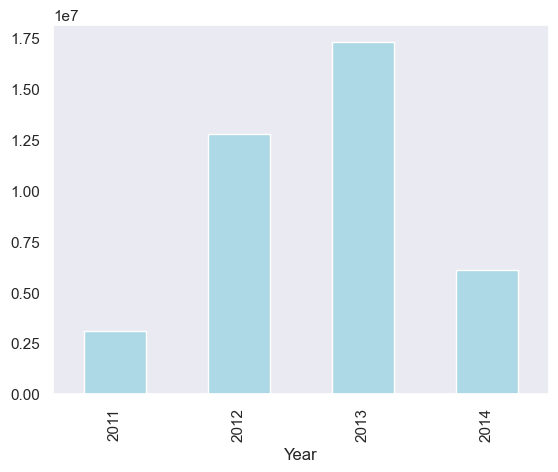

In [118]:
dt.groupby('Year')['Sales'].sum().plot(kind='bar', color = 'lightblue', grid=False)

#### Sales by Year

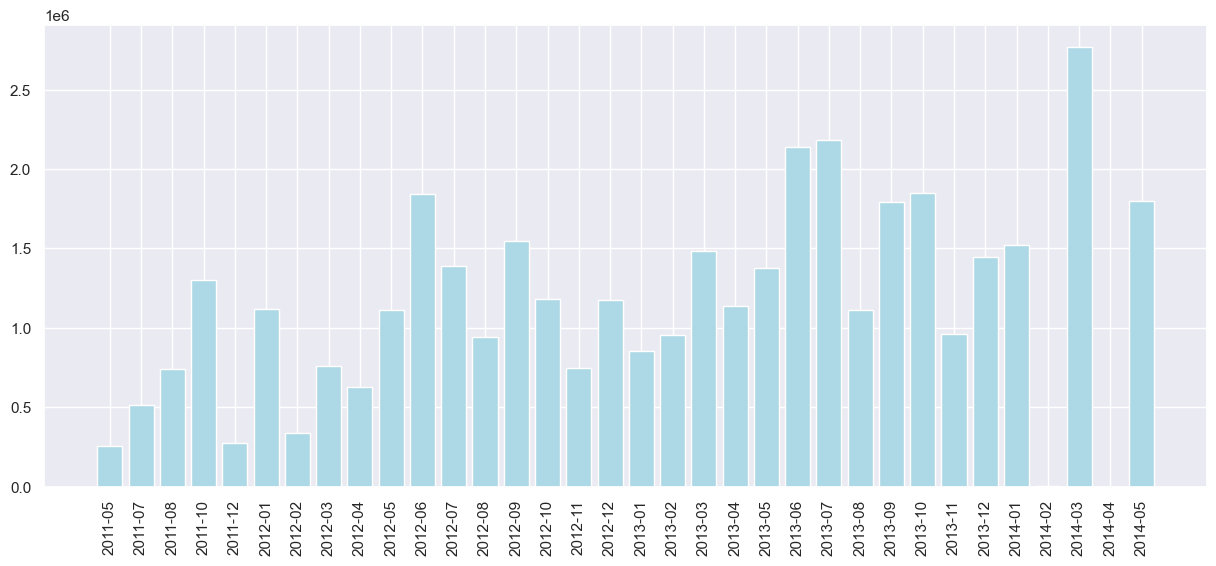

In [135]:
dt['Month'] = dt['Date'].apply(lambda x:x.strftime('%Y-%m'))
month_data = dt.groupby('Month')['Sales'].sum().reset_index()
months = [m for m, dt in dt.groupby('Month')]

plt.figure(figsize=(15,6))
plt.bar(months, month_data['Sales'], color='lightblue')
plt.xticks(rotation = 'vertical')
plt.show()

# Bivariate Analysis

In [43]:
ct = pd.crosstab(dt['Category'], dt['Country'])
ct

Country,Australia,Canada,France,Germany,United Kingdom,United States
Category,,,,,,
Accessories,161,929,324,238,309,2795
Bikes,658,4080,1156,614,1229,15048
Clothing,266,2297,804,417,702,6958
Components,423,3182,1218,518,1027,11003


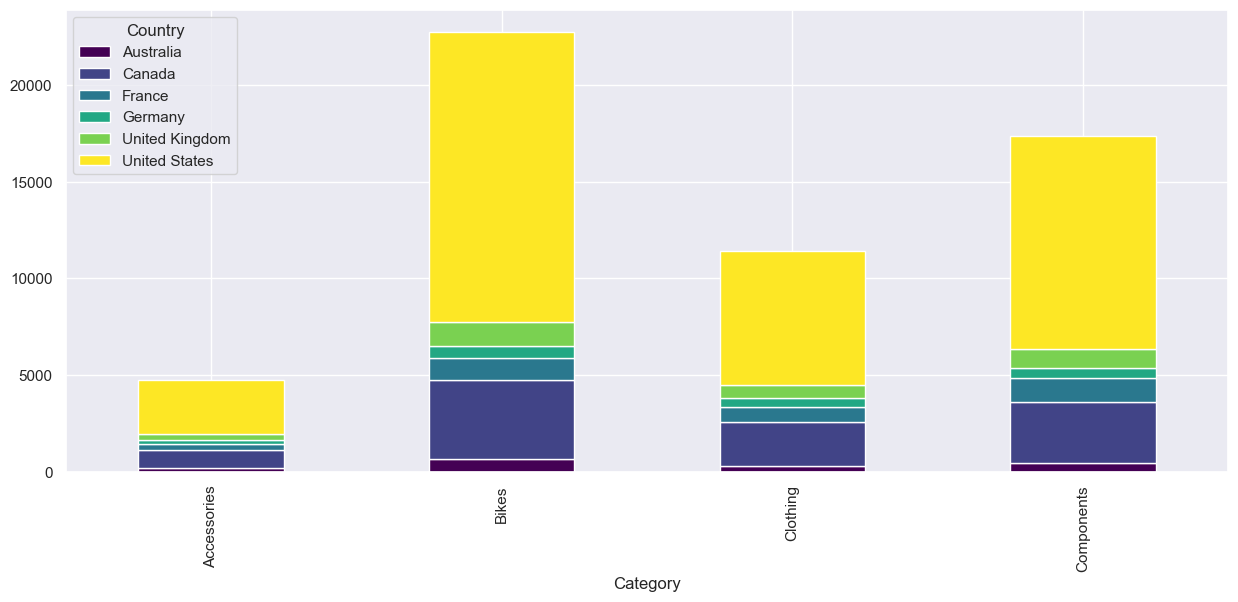

In [127]:
ct.plot.bar(stacked=True, figsize=(15,6), cmap = 'viridis')

plt.show()

In [46]:
stacked = ct.stack().reset_index().rename(columns={0: 'value'})
stacked

,Category,Country,value
0,Accessories,Australia,161
1,Accessories,Canada,929
2,Accessories,France,324
3,Accessories,Germany,238
4,Accessories,United Kingdom,309
5,Accessories,United States,2795
6,Bikes,Australia,658
7,Bikes,Canada,4080
8,Bikes,France,1156
9,Bikes,Germany,614


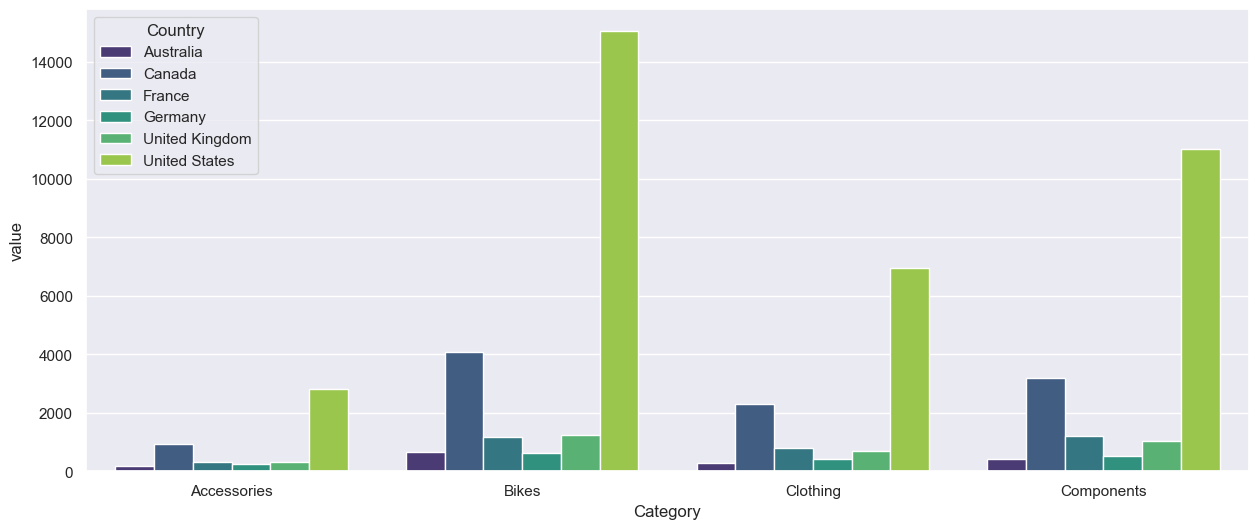

In [126]:
plt.figure(figsize=(15,6))
df = sns.barplot(x= stacked.Category, y=stacked.value, hue= stacked.Country, palette = 'viridis')

In [53]:
df_v = dt.groupby(['Category', 'Country']).mean([['Sales', 'Quantity']])
df_v

OrderCount       Sales  Quantity  Discount
Category    Country                                                   
Accessories Australia              1.0  141.513243  3.950311       0.0
            Canada                 1.0  118.106093  3.601722       0.0
            France                 1.0  145.004386  3.648148       0.0
            Germany                1.0  140.965954  3.697479       0.0
            United Kingdom         1.0  127.786167  3.624595       0.0
            United States          1.0  102.217656  3.407513       0.0
Bikes       Australia              1.0  706.209165  2.041033       0.0
            Canada                 1.0  639.674892  2.693382       0.0
            France                 1.0  625.649496  2.926471       0.0
            Germany                1.0  654.917783  2.519544       0.0
            United Kingdom         1.0  640.712035  2.726607       0.0
            United States          1.0  632.665514  2.746212       0.0
Clothing    Australia              1.0  154.412127  3.571429       0.0
            Canada                 1.0  151.995560  3.471920       0.0
            France                 1.0  159.030202  3.548507       0.0
            Germany                1.0  171.014797  3.685851       0.0
            United Kingdom         1.0  157.807864  3.616809       0.0
            United States          1.0  142.055954  3.383875       0.0
Components  Australia              1.0  315.273461  2.066194       0.0
            Canada                 1.0  415.260153  2.577938       0.0
            France                 1.0  388.744956  2.709360       0.0
            Germany                1.0  365.246073  2.274131       0.0
            United Kingdom         1.0  376.016198  2.612463       0.0
            United States          1.0  399.259173  2.483959       0.0

<Axes: xlabel='Category,Country'>

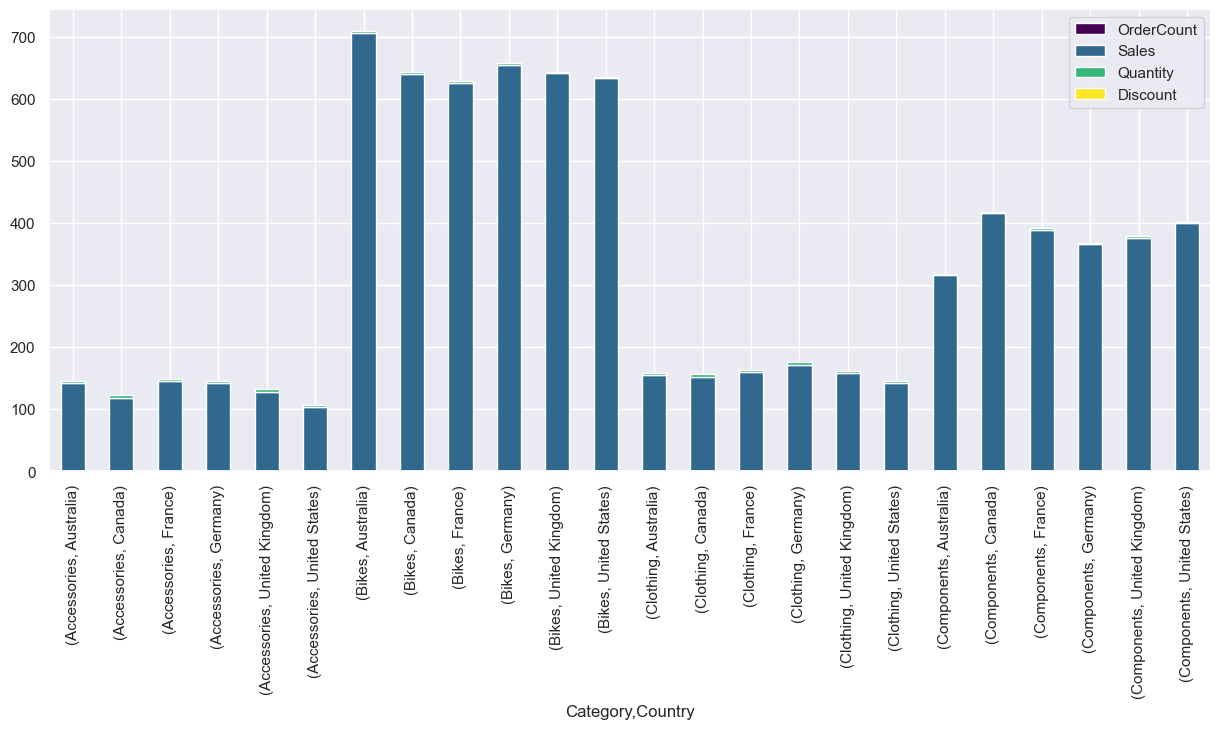

In [128]:
df_v.plot.bar(stacked= True, figsize=(15,6), cmap = 'viridis')

<Axes: xlabel='UnitPrice', ylabel='Sales'>

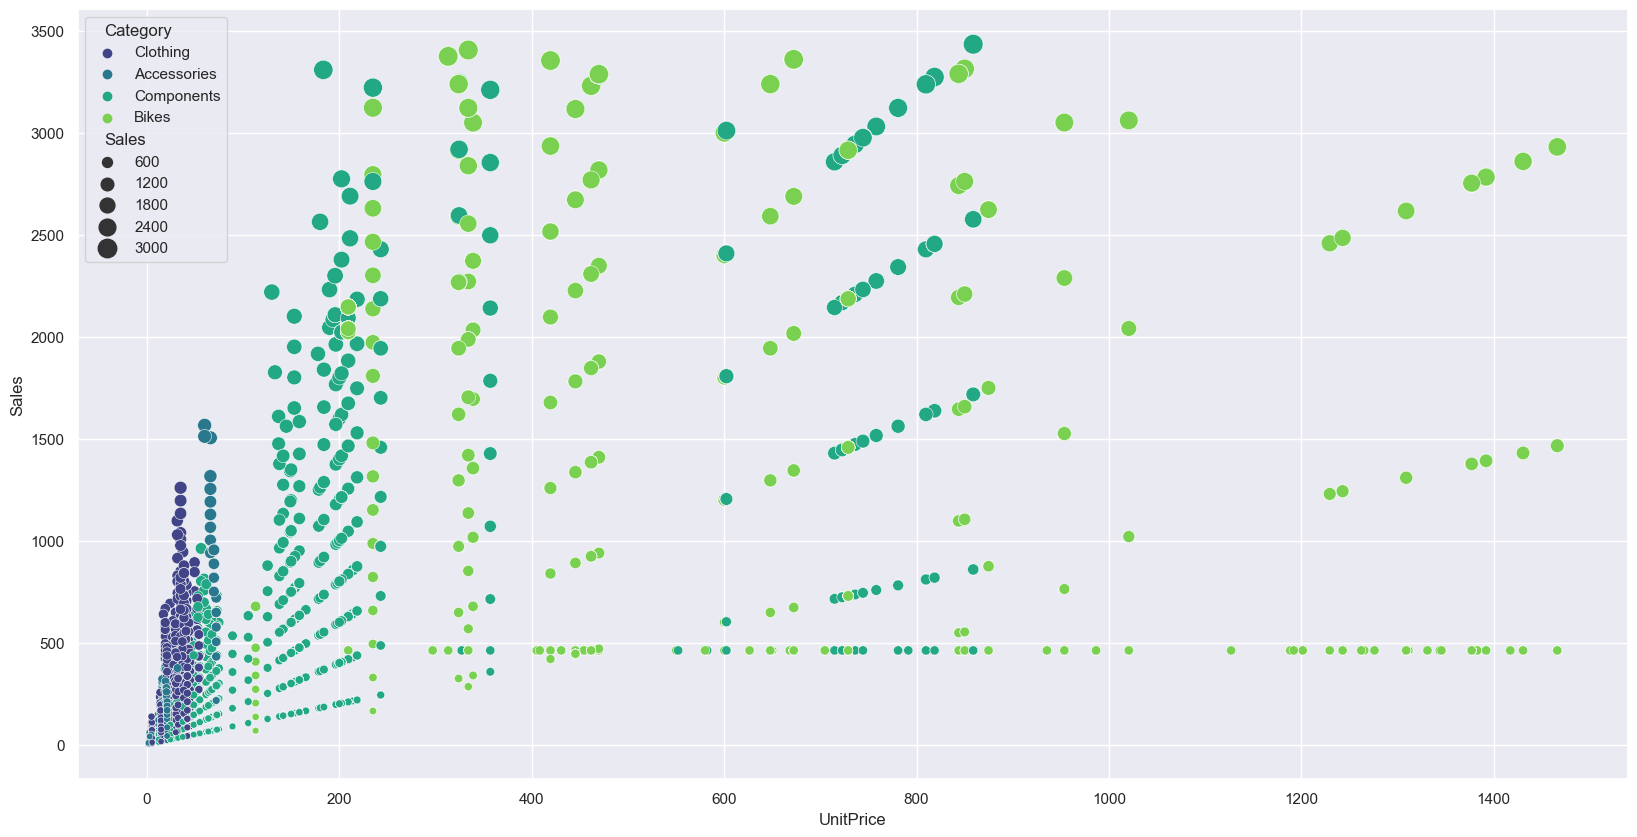

In [73]:
plt.figure(figsize= (20,10))
sns.scatterplot(data= dt, x = 'UnitPrice', y='Sales', hue = 'Category', sizes=(20,200),
               size='Sales', palette='viridis', legend='auto')

## Correlation Heatmap

Text(0.5, 1.0, 'Features Correlation with Sales')

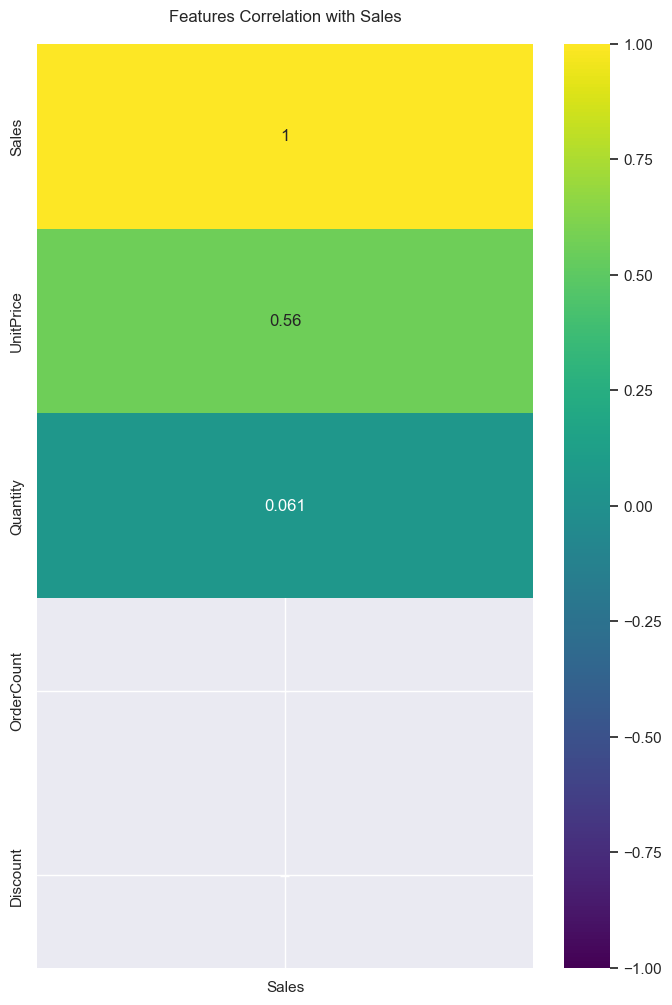

In [109]:
plt.figure(figsize = (8,12))
heatmap = sns.heatmap(num_feat_df.corr()[['Sales']].sort_values(by='Sales', ascending= False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Features Correlation with Sales', pad=16)